# Base Census
**Preveja se a renda excede US$ 50 mil/ano com base nos dados do censo. Também conhecido como conjunto de dados "Renda do Censo".**

A extração foi feita por Barry Becker do banco de dados do Censo de 1994. Um conjunto de registros razoavelmente limpos foi extraído usando as seguintes condições: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

A tarefa de previsão é determinar se uma pessoa faz mais de 50K ano.

https://archive.ics.uci.edu/ml/datasets/adult

## #4 - Testando o modelo Random Forest Classifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
path = '/content/drive/MyDrive/Machine Learning e Data Science com Python/Projeto - Census/'

In [6]:
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 150)

In [7]:
with open(path+'census_data_2.pkl', 'rb') as f:
  X_train, X_test, X_train_forest, X_test_forest, X_train_log_reg, X_test_log_reg, X_train_svm_lin, X_test_svm_lin, X_train_tree, X_test_tree, y_train, y_test = pkl.load(f)

X_train.shape, X_test.shape, X_train_forest.shape, X_test_forest.shape, X_train_log_reg.shape, X_test_log_reg.shape, X_train_svm_lin.shape, X_test_svm_lin.shape, X_train_tree.shape, X_test_tree.shape, y_train.shape, y_test.shape

((22792, 17),
 (9769, 17),
 (22792, 14),
 (9769, 14),
 (22792, 9),
 (9769, 9),
 (22792, 10),
 (9769, 10),
 (22792, 13),
 (9769, 13),
 (22792,),
 (9769,))

In [8]:
ForestClassifier = pkl.load(open(path+'RandomForestClassifier.sav', 'rb'))

## Predições na base de teste

In [9]:
y_pred = ForestClassifier.predict(X_test_forest)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, ..., 0, 0, 0])

### Matriz de confusão

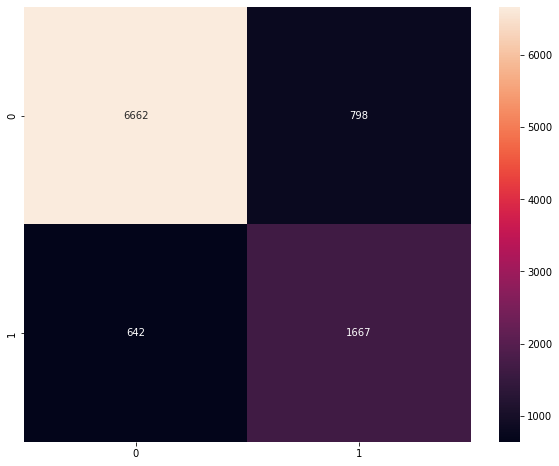

In [16]:
plt.figure(figsize = (10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

### Classification report

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7460
           1       0.68      0.72      0.70      2309

    accuracy                           0.85      9769
   macro avg       0.79      0.81      0.80      9769
weighted avg       0.86      0.85      0.85      9769

